# Exploratory Data Analysis

## Data Distributions

In [1]:
#Load required module
import pandas as pd

#Read the dataset into the pandas dataframe
df = pd.read_csv('solar_flares.csv')
df

,Unnamed: 0,class,largest spot,spot distribution,activity,evolution,24 hour flare activity,historically complex,complexity on this sun disk pass,area,area of largest spot,total flares
0,0,6,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,72.0
1,1,3,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
2,2,2,3.0,NaN,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
3,3,6,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,24.0
4,4,6,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1384,1384,2,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
1385,1385,3,2.0,2.0,1.0,3.0,NaN,1.0,2.0,1.0,2.0,9.0
1386,1386,4,4.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,24.0
1387,1387,2,2.0,2.0,1.0,3.0,1.0,1.0,NaN,1.0,1.0,3.0


In [2]:
#drops the unrequired index column
df.drop(df.columns[0],axis=1,inplace=True)

## We view the shape of our dataset and the datatypes of each of the available columns

In [3]:
df.shape

(1389, 11)

In [4]:
df.columns

Index(['class', 'largest spot', 'spot distribution', 'activity', 'evolution',
       '24 hour flare activity', 'historically complex',
       'complexity on this sun disk pass', 'area', 'area of largest spot',
       'total flares'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   class                             1389 non-null   int64  
 1   largest spot                      1386 non-null   float64
 2   spot distribution                 1377 non-null   float64
 3   activity                          1365 non-null   float64
 4   evolution                         1323 non-null   float64
 5   24 hour flare activity            1310 non-null   float64
 6   historically complex              1324 non-null   float64
 7   complexity on this sun disk pass  1344 non-null   float64
 8   area                              1354 non-null   float64
 9   area of largest spot              1344 non-null   float64
 10  total flares                      1379 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 119.5 KB


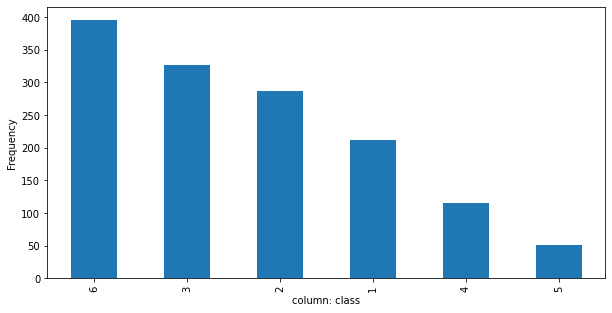

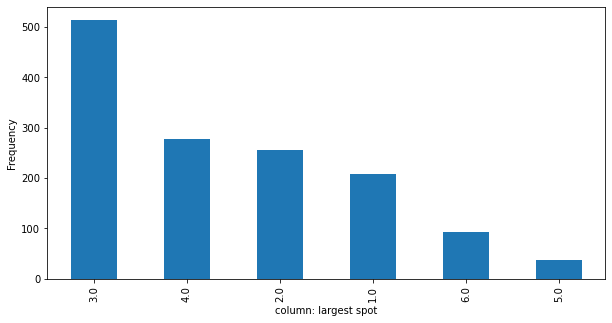

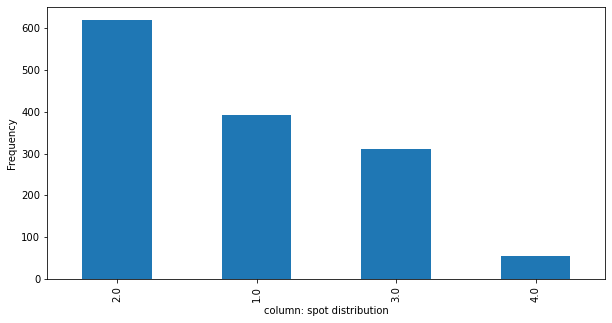

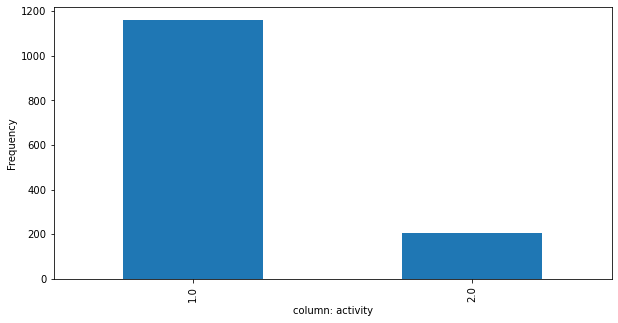

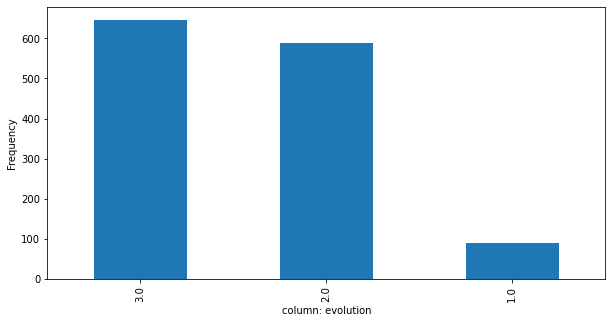

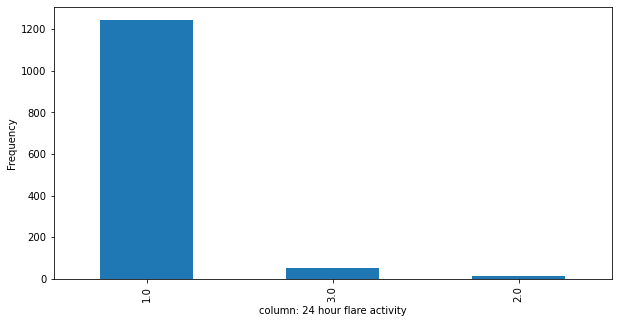

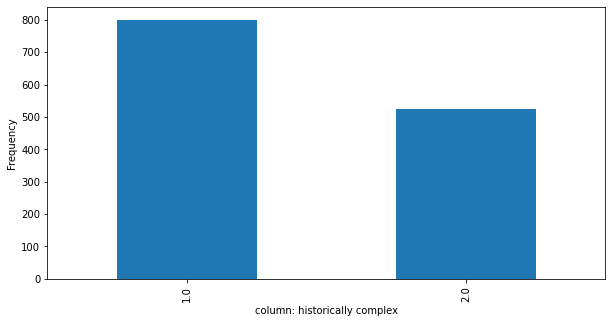

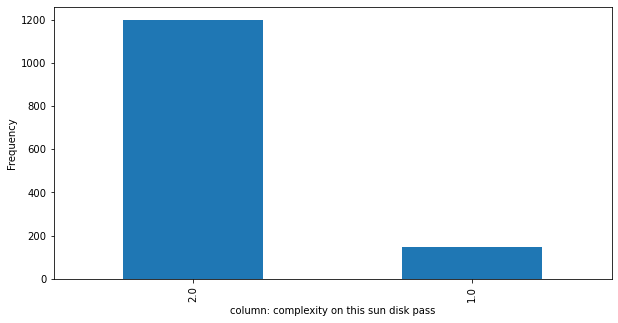

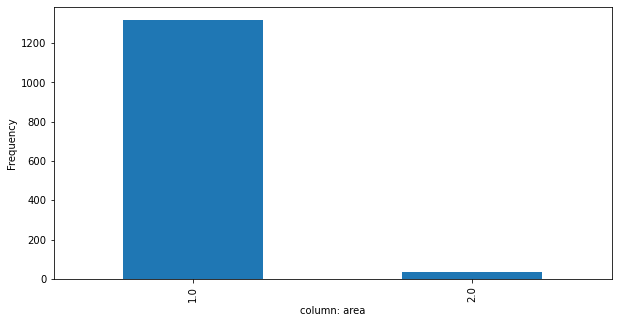

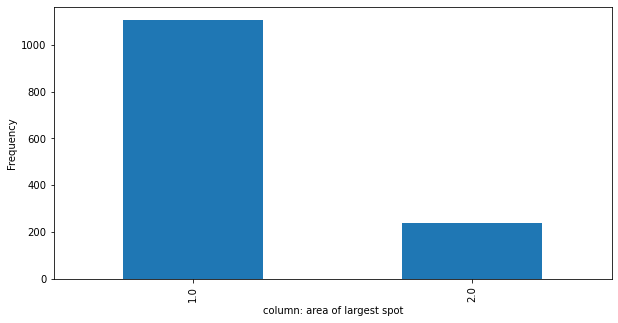

In [6]:
import matplotlib.pyplot as plt

cols = df.columns.drop('total flares')

#Loops to generate bar charts showing the frequency of different values in the dataset
for col in cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().plot( kind='bar')
    plt.xlabel("column: "+ col)
    plt.ylabel("Frequency")
    plt.savefig(col+"_frequency..jpg",bbox_inches='tight')

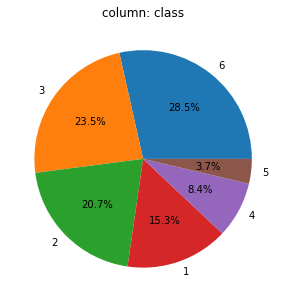

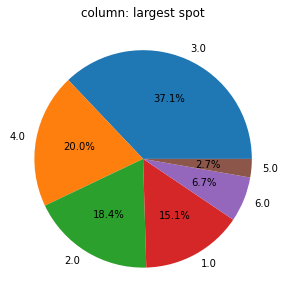

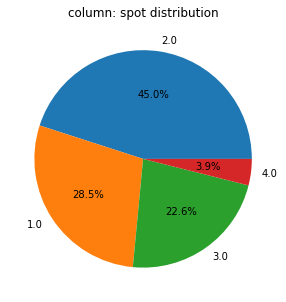

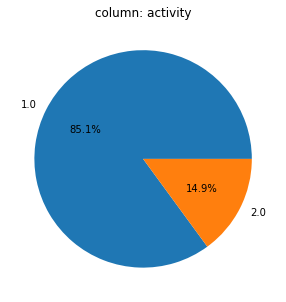

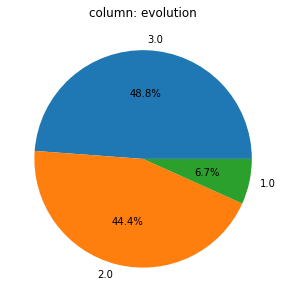

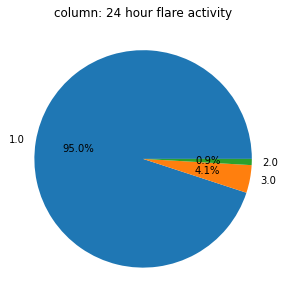

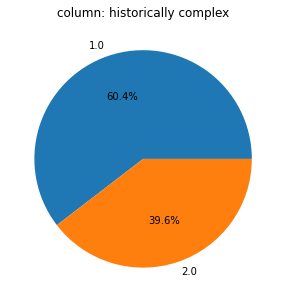

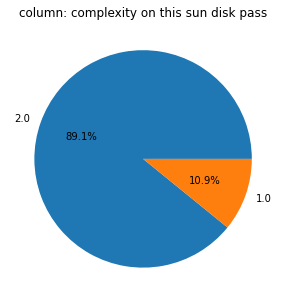

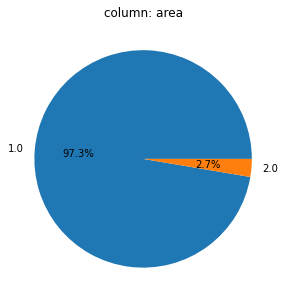

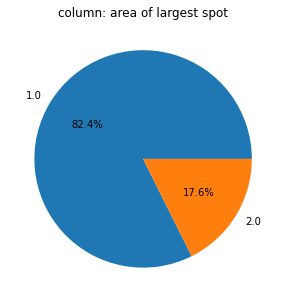

In [7]:
#Loops through the columns. Generates a pie chart for each column within the dataset.
for col in cols:
    plt.figure(figsize=(10,5))
    counts = df[col].value_counts()
    #print(counts.index)
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
    plt.title('column: '+col)
    plt.savefig(col+"_pie..jpg",bbox_inches='tight')

([<matplotlib.axis.XTick at 0x200316eac40>,
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(0, 0, ''),
  Text(0, 0, '')])

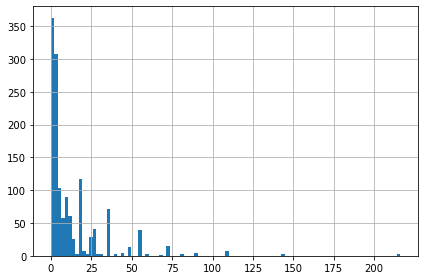

In [8]:
#Creates a distribution histogram for the 'total flares' column
#The x ticks are changed such that we can see the data more accurately.
import numpy as np

flares = df['total flares']
df['total flares'].hist(bins=100)
plt.tight_layout()
plt.xticks(np.arange(flares.min(), flares.max()+1, 25.0))

## Missing Data

C:\Users\shiva\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

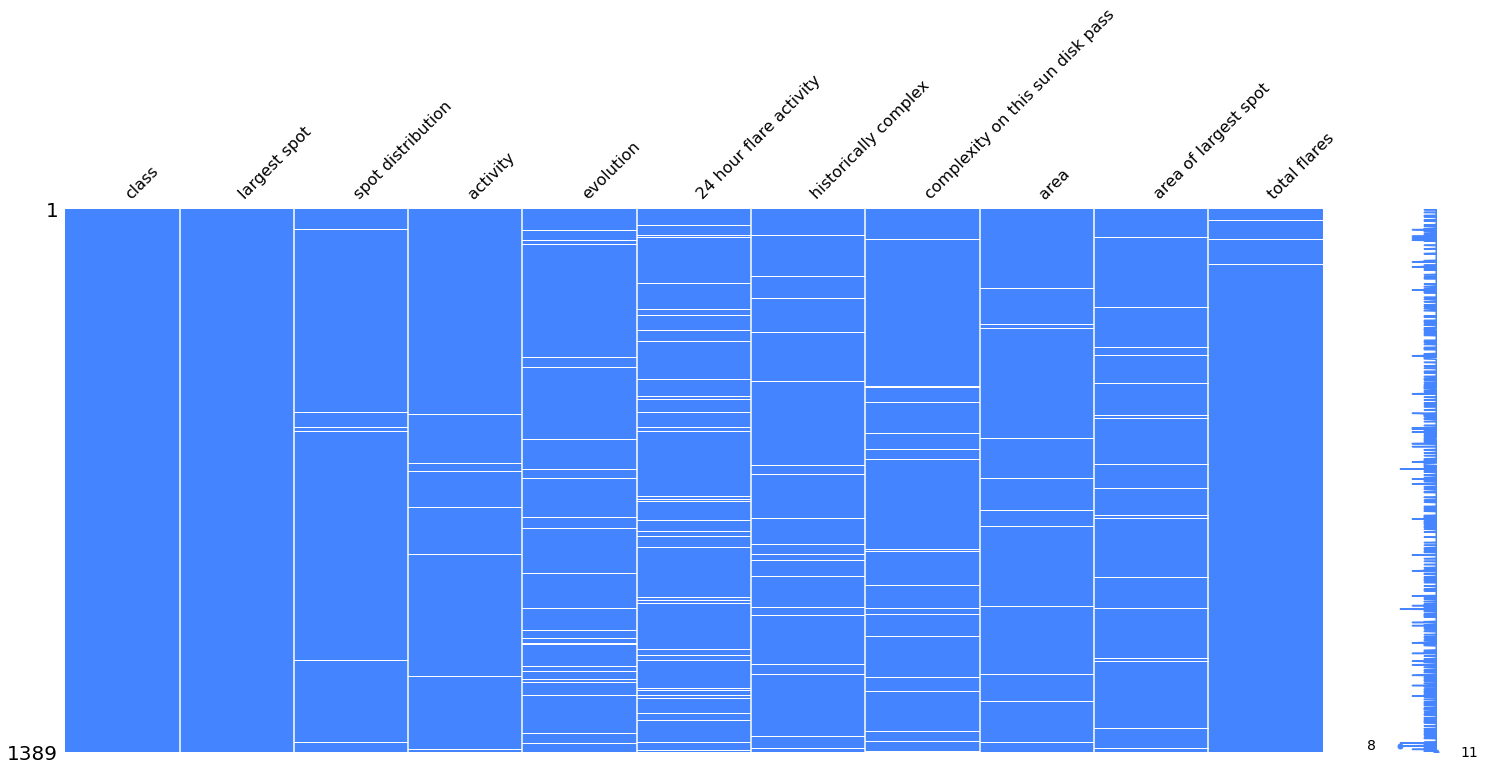

In [9]:
#Allows us to view a map of the data, highlighting the missing data within the dataset.
import missingno as msno
msno.matrix(df,color=(0.27, 0.52, 1.0))

# Data Preprocessing

## Data Cleaning

### Missing Data

In [10]:
#Shows the amount of missing data within each column
df.isna().sum()

class                                0
largest spot                         3
spot distribution                   12
activity                            24
evolution                           66
24 hour flare activity              79
historically complex                65
complexity on this sun disk pass    45
area                                35
area of largest spot                45
total flares                        10
dtype: int64

#### Replacing missing data with mode

In [11]:
import numpy as np

df['largest spot'] = df['largest spot'].fillna(df['largest spot'].mode()[0])
df['spot distribution'] = df['spot distribution'].fillna(df['spot distribution'].mode()[0])
df['activity'] = df['activity'].fillna(df['activity'].mode()[0])
df['evolution'] = df['evolution'].fillna(df['evolution'].mode()[0])
df['24 hour flare activity'] = df['24 hour flare activity'].fillna(df['24 hour flare activity'].mode()[0])
df['historically complex'] = df['historically complex'].fillna(df['historically complex'].mode()[0])
df['complexity on this sun disk pass'] = df['complexity on this sun disk pass'].fillna(df['complexity on this sun disk pass'].mode()[0])
df['area'] = df['area'].fillna(df['area'].mode()[0])
df['area of largest spot'] = df['area of largest spot'].fillna(df['area of largest spot'].mode()[0])
df

,class,largest spot,spot distribution,activity,evolution,24 hour flare activity,historically complex,complexity on this sun disk pass,area,area of largest spot,total flares
0,6,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,72.0
1,3,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
2,2,3.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
3,6,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,24.0
4,6,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1384,2,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
1385,3,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,9.0
1386,4,4.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,24.0
1387,2,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,3.0


#### Deleting missing values in the target variable

In [12]:
#The missing values in the target varaible column are dropped.
#We dont replace these values as it might affect the accuracy of our model
df.dropna(subset = ['total flares'], inplace = True)
df

,class,largest spot,spot distribution,activity,evolution,24 hour flare activity,historically complex,complexity on this sun disk pass,area,area of largest spot,total flares
0,6,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,72.0
1,3,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
2,2,3.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
3,6,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,24.0
4,6,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1384,2,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
1385,3,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,9.0
1386,4,4.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,24.0
1387,2,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,3.0


#### We look at the data again after the cleaning process and we see that there are no missing data in any of the columns

In [13]:
df.isna().sum()

class                               0
largest spot                        0
spot distribution                   0
activity                            0
evolution                           0
24 hour flare activity              0
historically complex                0
complexity on this sun disk pass    0
area                                0
area of largest spot                0
total flares                        0
dtype: int64

## Outlier Analysis

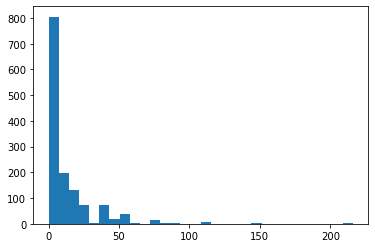

In [14]:
#Creates a histogram showing the distribution in the 'total flares' column
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df['total flares'], 30)
plt.show()

In [15]:
# The total skewness of the data is viewed. 
print('Skewness value of Total Flares:', df['total flares'].skew())

Skewness value of Total Flares: 3.836154138449731


<AxesSubplot:>

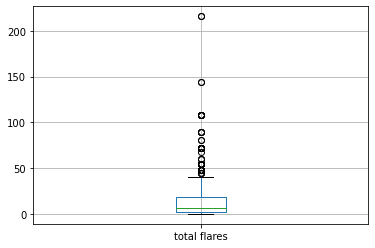

In [16]:
df.boxplot(column = 'total flares')

In [17]:
# This shows the statistical summary of the 'total flares column'
df['total flares'].describe()

count    1379.000000
mean       12.831037
std        19.159169
min         0.000000
25%         2.000000
50%         6.000000
75%        18.000000
max       216.000000
Name: total flares, dtype: float64

### Removing Outliers


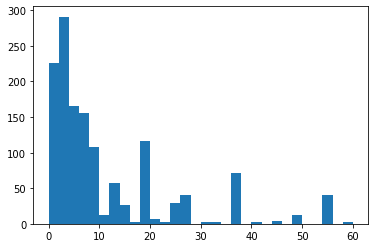

Skewness value of Total Flares: 1.8451440451166443


In [18]:
#This block of code replaces the outliers using the median of the 'total flares' column
#We replace the values that are 3 or more standard deviations away from the mean. 

md = np.median(df['total flares'])
sd = np.std(df['total flares'])

df['total flares'] = np.where(df['total flares'] > md + 3*sd, md, df['total flares'])

plt.hist(df['total flares'], 30)
plt.show()
print('Skewness value of Total Flares:', df['total flares'].skew())

<AxesSubplot:>

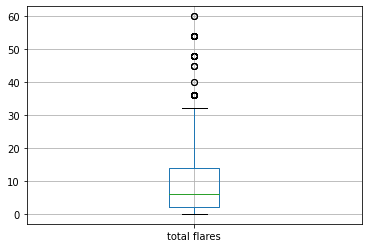

In [19]:
df.boxplot(column = 'total flares')

## Encoding
We can encode our dataset using the LabelEncoder class. However, we have chosen not to do so as we do need to encode our data. This is because all our variables are categorical and hence we labeling is not necessary.

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df.head()

,class,largest spot,spot distribution,activity,evolution,24 hour flare activity,historically complex,complexity on this sun disk pass,area,area of largest spot,total flares
0,6,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,6.0
1,3,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
2,2,3.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
3,6,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,24.0
4,6,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0


## Scaling
Scaling can be used to make sure certain independent variables dont have an overwhelming impact on the result of the model. However, once again we cannot scale our independent variables as they are nominal categorical data.

Furthermore, we do not apply the scaler to our target variable because this is the variable we are trying to predict. This is the target variable and we do not need to do so. Transforming the data in this way may hurt the accuracy of our model. 

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.head()

,class,largest spot,spot distribution,activity,evolution,24 hour flare activity,historically complex,complexity on this sun disk pass,area,area of largest spot,total flares
0,6,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,6.0
1,3,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
2,2,3.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0
3,6,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,24.0
4,6,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0


## Feature Selection

## Backwards Elimination

This method allows us to see which features best fit our model. We iteratively choose different combinations of possible features that would be best suited for prediction techniques

### Correlations

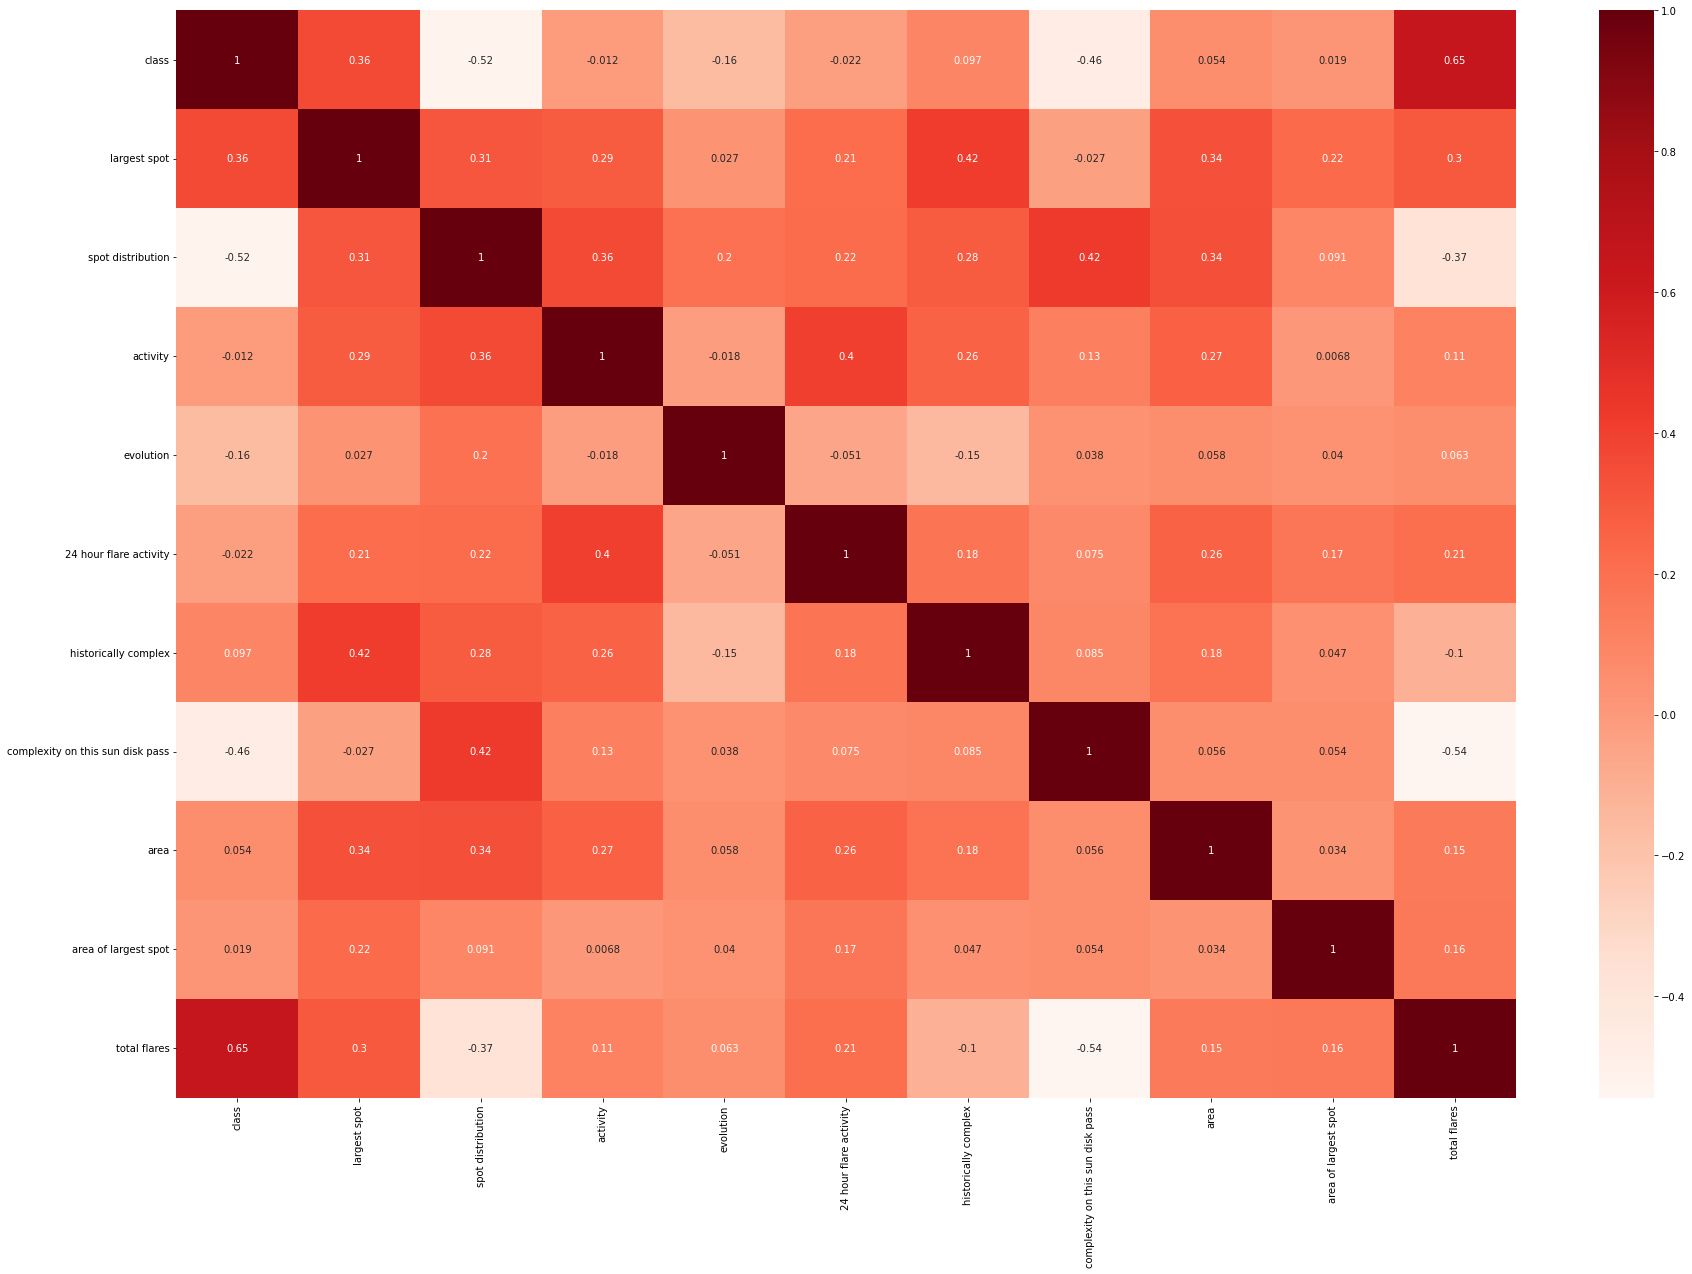

In [22]:
#Generates a heatmap showing different correlations

import seaborn as sb
plt.figure(figsize=(30,20))
pearson = df.corr()
sb.heatmap(pearson, annot=True,cmap = plt.cm.Reds)
plt.show()

In [23]:
core_target = abs(pearson["total flares"])
relevant_features = core_target[core_target>0.5]
relevant_features

class                               0.647440
complexity on this sun disk pass    0.543888
total flares                        1.000000
Name: total flares, dtype: float64

In [24]:
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
#Removes deprecation messages from the notebook

#We seperate our dataset into our features, and target variable
features = df.drop('total flares', axis=1)
target = df['total flares'].values
feats_1 = sm.add_constant(features)
model = sm.OLS(target,feats_1).fit()
model.pvalues

const                               4.781684e-01
class                               2.480374e-47
largest spot                        6.089452e-11
spot distribution                   4.615532e-13
activity                            1.179279e-11
evolution                           1.940428e-17
24 hour flare activity              3.646161e-25
historically complex                3.946093e-25
complexity on this sun disk pass    6.477947e-57
area                                7.466396e-09
area of largest spot                2.068955e-12
dtype: float64

In [25]:
cols = list(features.columns)

while (len(cols)>0):
    p= []
    feats_1 = features[cols]
    feats_1 = sm.add_constant(features)
    model = sm.OLS(target,feats_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
selected_features_BE

['class',
 'largest spot',
 'spot distribution',
 'activity',
 'evolution',
 '24 hour flare activity',
 'historically complex',
 'complexity on this sun disk pass',
 'area',
 'area of largest spot']

In [26]:
cols

['class',
 'largest spot',
 'spot distribution',
 'activity',
 'evolution',
 '24 hour flare activity',
 'historically complex',
 'complexity on this sun disk pass',
 'area',
 'area of largest spot']

In [27]:
cols.append('total flares')

In [28]:
df=df[cols]

## We studied the data again after performing data cleaning. This shows different statistics of the data after the cleaning process is concluded.

In [29]:
# to find the mean
import numpy as np

def calculate_mean(data):
    return np.mean(data)

In [30]:
# to find the median
import numpy as np

def calculate_median(data):
    return np.median(data)

In [31]:
# to find the mode
import statistics

def calculate_mode(data):
    return statistics.mode(data)

In [32]:
from tabulate import tabulate

mmm_data = [['0', 'class', '%.2f' % calculate_mean(df['class']), calculate_median(df['class']), calculate_mode(df['class'])],
            ['1', 'largest spot', '%.2f' % calculate_mean(df['largest spot']), calculate_median(df['largest spot']), calculate_mode(df['largest spot'])],            
            ['2', 'spot distribution', '%.2f' % calculate_mean(df['spot distribution']), calculate_median(df['spot distribution']), calculate_mode(df['spot distribution'])],              
            ['3', 'activity', '%.2f' % calculate_mean(df['activity']), calculate_median(df['activity']), calculate_mode(df['activity'])],                          
            ['4', 'evolution', '%.2f' % calculate_mean(df['evolution']), calculate_median(df['evolution']), calculate_mode(df['evolution'])], 
            ['5', '24 hour flare activity', '%.2f' % calculate_mean(df['24 hour flare activity']), calculate_median(df['24 hour flare activity']), calculate_mode(df['24 hour flare activity'])], 
            ['6', 'historically complex', '%.2f' % calculate_mean(df['historically complex']), calculate_median(df['historically complex']), calculate_mode(df['historically complex'])], 
            ['7', 'complexity on this sun disk pass', '%.2f' % calculate_mean(df['complexity on this sun disk pass']), calculate_median(df['complexity on this sun disk pass']), calculate_mode(df['complexity on this sun disk pass'])], 
            ['8', 'area', '%.2f' % calculate_mean(df['area']), calculate_median(df['area']), calculate_mode(df['area'])], 
            ['9', 'area of largest spot', '%.2f' % calculate_mean(df['area of largest spot']), calculate_median(df['area of largest spot']), calculate_mode(df['area of largest spot'])],
            ['10', 'total flares', '%.2f' % calculate_mean(df['total flares']), calculate_median(df['total flares']), calculate_mode(df['total flares'])]]

col_names = ['#', 'Column', 'Mean', 'Median', 'Mode']
  
print(tabulate(mmm_data, headers = col_names))

  #  Column                              Mean    Median    Mode
---  --------------------------------  ------  --------  ------
  0  class                               3.5          3       6
  1  largest spot                        2.97         3       3
  2  spot distribution                   2.02         2       2
  3  activity                            1.15         1       1
  4  evolution                           2.45         3       3
  5  24 hour flare activity              1.09         1       1
  6  historically complex                1.38         1       1
  7  complexity on this sun disk pass    1.9          2       2
  8  area                                1.03         1       1
  9  area of largest spot                1.17         1       1
 10  total flares                       10.69         6       3


In [33]:
# to find the min
def calculate_min(data):
    return min(data)

In [34]:
# to find the max
def calculate_max(data):
    return max(data)

In [35]:
# to find the range
def calculate_range(data):
    return max(data) - min(data)

In [36]:
from tabulate import tabulate

mmr_data = [[ '0', 'class', calculate_min(df['class']), calculate_max(df['class']), calculate_range(df['class'])],            
            ['1', 'largest spot', calculate_min(df['largest spot']), calculate_max(df['largest spot']), calculate_range(df['largest spot'])],            
            ['2', 'spot distribution', calculate_min(df['spot distribution']), calculate_max(df['spot distribution']), calculate_range(df['spot distribution'])],             
            ['3', 'activity', calculate_min(df['activity']), calculate_max(df['activity']), calculate_range(df['activity'])],             
            ['4', 'evolution', calculate_min(df['evolution']), calculate_max(df['evolution']), calculate_range(df['evolution'])], 
            ['5', '24 hour flare activity', calculate_min(df['24 hour flare activity']), calculate_max(df['24 hour flare activity']), calculate_range(df['24 hour flare activity'])], 
            ['6', 'historically complex', calculate_min(df['historically complex']), calculate_max(df['historically complex']), calculate_range(df['historically complex'])], 
            ['7', 'complexity on this sun disk pass', calculate_min(df['complexity on this sun disk pass']), calculate_max(df['complexity on this sun disk pass']), calculate_range(df['complexity on this sun disk pass'])], 
            ['8', 'area', calculate_min(df['area']), calculate_max(df['area']), calculate_range(df['area'])], 
            ['9', 'area of largest spot', calculate_min(df['area of largest spot']), calculate_max(df['area of largest spot']), calculate_range(df['area of largest spot'])],
            ['10', 'total flares', calculate_min(df['total flares']), calculate_max(df['total flares']), calculate_range(df['total flares'])]]

col_names = ['#', 'Column', 'Min', 'Max', 'Range']
  
print(tabulate(mmr_data, headers = col_names))

  #  Column                              Min    Max    Range
---  --------------------------------  -----  -----  -------
  0  class                                 1      6        5
  1  largest spot                          1      6        5
  2  spot distribution                     1      4        3
  3  activity                              1      2        1
  4  evolution                             1      3        2
  5  24 hour flare activity                1      3        2
  6  historically complex                  1      2        1
  7  complexity on this sun disk pass      1      2        1
  8  area                                  1      2        1
  9  area of largest spot                  1      2        1
 10  total flares                          0     60       60


In [37]:
# to find the standard deviation
def calculate_std(data):
    return data.std()

In [38]:
# to find the variance
def calculate_var(data):
    return data.var()

In [39]:
from tabulate import tabulate

sdv_data = [[ '0', 'class', '%.2f' % calculate_std(df['class']), '%.2f' % calculate_var(df['class'])],            
            ['1', 'largest spot', '%.2f' % calculate_std(df['largest spot']), '%.2f' % calculate_var(df['largest spot'])],             
            ['2', 'spot distribution', '%.2f' % calculate_std(df['spot distribution']), '%.2f' % calculate_var(df['spot distribution'])],              
            ['3', 'activity', '%.2f' % calculate_std(df['activity']), '%.2f' % calculate_var(df['activity'])],            
            ['4', 'evolution', '%.2f' % calculate_std(df['evolution']), '%.2f' % calculate_var(df['evolution'])], 
            ['5', '24 hour flare activity', '%.2f' % calculate_std(df['24 hour flare activity']), '%.2f' % calculate_var(df['24 hour flare activity'])], 
            ['6', 'historically complex', '%.2f' % calculate_std(df['historically complex']), '%.2f' % calculate_var(df['historically complex'])], 
            ['7', 'complexity on this sun disk pass', '%.2f' % calculate_std(df['complexity on this sun disk pass']), '%.2f' % calculate_var(df['complexity on this sun disk pass'])], 
            ['8', 'area', '%.2f' % calculate_std(df['area']), '%.2f' % calculate_var(df['area'])], 
            ['9', 'area of largest spot', '%.2f' % calculate_std(df['area of largest spot']), '%.2f' % calculate_var(df['area of largest spot'])],
            ['10', 'total flares', '%.2f' % calculate_std(df['total flares']), '%.2f' % calculate_var(df['total flares'])]]

col_names = ['#', 'Column', 'Standard Deviation', 'Variance']
  
print(tabulate(sdv_data, headers = col_names))

  #  Column                              Standard Deviation    Variance
---  --------------------------------  --------------------  ----------
  0  class                                             1.83        3.36
  1  largest spot                                      1.3         1.69
  2  spot distribution                                 0.81        0.66
  3  activity                                          0.35        0.13
  4  evolution                                         0.61        0.37
  5  24 hour flare activity                            0.4         0.16
  6  historically complex                              0.49        0.24
  7  complexity on this sun disk pass                  0.31        0.09
  8  area                                              0.16        0.03
  9  area of largest spot                              0.38        0.14
 10  total flares                                     12.98      168.38


# Modelling

## Regression

We use the most correlated variables to create a regression model. We see that the 'class' column has the highest correlation

In [40]:
df.corr()

,class,largest spot,spot distribution,activity,evolution,24 hour flare activity,historically complex,complexity on this sun disk pass,area,area of largest spot,total flares
class,1.000000,0.356698,-0.522474,-0.011674,-0.162039,-0.022472,0.097122,-0.464771,0.054155,0.018786,0.647440
largest spot,0.356698,1.000000,0.310016,0.285571,0.027057,0.210899,0.417480,-0.027104,0.335618,0.224063,0.299581
spot distribution,-0.522474,0.310016,1.000000,0.359467,0.196421,0.221170,0.284317,0.421705,0.336736,0.090743,-0.373441
activity,-0.011674,0.285571,0.359467,1.000000,-0.018133,0.403645,0.263009,0.128485,0.265708,0.006841,0.109544
evolution,-0.162039,0.027057,0.196421,-0.018133,1.000000,-0.050887,-0.148315,0.038196,0.057941,0.040072,0.062870
24 hour flare activity,-0.022472,0.210899,0.221170,0.403645,-0.050887,1.000000,0.175713,0.074810,0.261831,0.171908,0.205747
historically complex,0.097122,0.417480,0.284317,0.263009,-0.148315,0.175713,1.000000,0.085124,0.181965,0.047007,-0.104373
complexity on this sun disk pass,-0.464771,-0.027104,0.421705,0.128485,0.038196,0.074810,0.085124,1.000000,0.055906,0.054423,-0.543888
area,0.054155,0.335618,0.336736,0.265708,0.057941,0.261831,0.181965,0.055906,1.000000,0.034282,0.154984
area of largest spot,0.018786,0.224063,0.090743,0.006841,0.040072,0.171908,0.047007,0.054423,0.034282,1.000000,0.158883


#### We have only categorical data so we must transform the data using one hot encoding before we can train the model. This is done in the following code block

In [41]:
#Create new dataframe containing OneHotEncoded data from the 'class' column

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
features_array = enc.fit_transform(df[['class']]).toarray()
feature_labels = enc.categories_
feature_labels= np.array(feature_labels).ravel()
column_names =[]

for r in range(len(feature_labels)):
    column_names.append('Class'+str(feature_labels[r]))
    
new_cols = pd.DataFrame(features_array, columns=column_names)
new_cols

,Class1,Class2,Class3,Class4,Class5,Class6
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
1374,0.0,1.0,0.0,0.0,0.0,0.0
1375,0.0,0.0,1.0,0.0,0.0,0.0
1376,0.0,0.0,0.0,1.0,0.0,0.0
1377,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
# the features used for prediction are properly compiled

copy = df['complexity on this sun disk pass']
copy.reset_index(drop=True,inplace=True)
new_cols.reset_index(drop=True,inplace=True)
x = pd.concat([copy,new_cols],axis=1,join='inner')
x.shape

(1379, 7)

In [43]:
#Splits the data into training and testing sets. The model is trained

y = df['total flares'].to_numpy()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression

lgr = LinearRegression()

lgr_model = lgr.fit(x_train,y_train.ravel())

In [44]:
#Linear regression model used for prediction
lgr_preds = lgr_model.predict(x_test)

In [45]:
#Generates the r2 score for the model
from sklearn.metrics import r2_score

r2_score(y_test,lgr_preds)

0.5185485741580811

## KNN

In [46]:
#Creates the columns
copy_df = df
copy_df['total flares'] = np.where(df['total flares'].between(-1,10), 0, copy_df['total flares'])
copy_df['total flares'] = np.where(df['total flares'].between(9,20), 1, copy_df['total flares'])
copy_df['total flares'] = np.where(df['total flares'].between(19,30), 2, copy_df['total flares'])
copy_df['total flares'] = np.where(df['total flares'].between(29,40), 3, copy_df['total flares'])
copy_df['total flares'] = np.where(df['total flares'] >= 40, 4, copy_df['total flares'])

In [47]:
#seperates a new training and testing set for the classifier algorithms

from sklearn.neighbors import KNeighborsClassifier

x = df.drop('total flares',axis=1).to_numpy()
y = copy_df['total flares'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

knn_models = []
knn_preds = []

# we loop through multiple iterations of 'n_neighbors' to find the best model
for r in range(5,51):
    curr_model=KNeighborsClassifier(n_neighbors=r)
    knn_models.append(curr_model.fit(x_train,y_train.ravel()))
    knn_pred=curr_model.predict(x_test)
    knn_preds.append(knn_pred)

knn_scores = []

from sklearn.metrics import accuracy_score


for r in range(len(knn_preds)):
    knn_scores.append(accuracy_score(knn_preds[r],y_test))

best_model = np.argmax(np.array(knn_scores))

final_knn_model = knn_models[best_model]
knn_preds = knn_preds[best_model]

## Decision tree
Creates a decision tree classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(x_train,y_train)

In [50]:
dtc_preds = dtc_model.predict(x_test)

## Random Forest
Creates a random forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(x_train,y_train)

In [53]:
rfc_preds = rfc_model.predict(x_test)

# Naive Bayes
Creates a Naive Bayes classifier

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train,y_train)

In [56]:
gnb_preds = gnb_model.predict(x_test)

## SVM
Creates a SVM classifier

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC()
svc_model = svc.fit(x_train,y_train)

In [59]:
svc_preds = svc_model.predict(x_test)

## Artificial Neural Network
Creates a A neural network classifier

In [60]:
#necessary libraries imported

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

In [61]:
#Choosing sequential model
model = Sequential()

#Different types of neuron layers defined with activation methods
model.add(Dense(64,activation='relu',input_dim=10))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

#the optimizer is defined
sgd = SGD(learning_rate=0.01,decay=1e-6,momentum=0.9,nesterov=True)

In [62]:
#Compiles the model using an appropriate loss function
model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [63]:
#model is fitted to the training data and the training process is saved
ann_info = model.fit(x_train,y_train,epochs=2000,batch_size=128)

Epoch 1/2000
8/8 [==============================] - 0s 4ms/step - loss: 1.5364 - accuracy: 0.4694
Epoch 2/2000
8/8 [==============================] - 0s 3ms/step - loss: 1.0694 - accuracy: 0.6798
Epoch 3/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.9883 - accuracy: 0.6850
Epoch 4/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.9020 - accuracy: 0.6995
Epoch 5/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.8627 - accuracy: 0.6850
Epoch 6/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.8381 - accuracy: 0.6964
Epoch 7/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.8273 - accuracy: 0.7005
Epoch 8/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.8198 - accuracy: 0.7078
Epoch 9/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.8009 - accuracy: 0.7119
Epoch 10/2000
8/8 [==============================] - 0s 2ms/step - loss: 0.7908 - accuracy: 0.7109
Epoch 11/2000
8/8 [

## AdaBoost Ensemble Classifier
Creates a AdaBoost Ensemble Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
abc_models = []

In [66]:
#different values of n_estimator is iterated through to find the best model
for r in range(2,50):
    abc= AdaBoostClassifier(base_estimator=None,n_estimators=r,random_state=1)
    abc_models.append(abc.fit(x_train,y_train))

In [67]:
abc_scores = []
for r in range(48):
    abc_scores.append(abc_models[r].score(x_test,y_test))

In [68]:
abc_scores = np.array(abc_scores)
np.argmax(abc_scores)

9

In [69]:
abc= abc_models[9]
final_abc =abc.fit(x_train,y_train) 
abc_preds = abc.predict(x_test)

## XGBoost
Creates a XGBooste Classifier

In [70]:
import xgboost
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score

xgb = xgboost.XGBClassifier(learning_rate =0.1,
                                max_depth=5,
                                n_estimators=5000,
                                subsample=0.5,
                                colsample_bytree=0.35,
                                eval_metric='auc',
                                verbosity=1)
eval_set = [(x_test,y_test)]

xgb_model = xgb.fit(x_train,y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=True)

[0]	validation_0-auc:0.74247
[1]	validation_0-auc:0.83492
[2]	validation_0-auc:0.90843
[3]	validation_0-auc:0.92424
[4]	validation_0-auc:0.92973
[5]	validation_0-auc:0.93497
[6]	validation_0-auc:0.93776
[7]	validation_0-auc:0.93675
[8]	validation_0-auc:0.93895
[9]	validation_0-auc:0.93793
[10]	validation_0-auc:0.94168
[11]	validation_0-auc:0.94352
[12]	validation_0-auc:0.94506
[13]	validation_0-auc:0.94410
[14]	validation_0-auc:0.94735
[15]	validation_0-auc:0.94872
[16]	validation_0-auc:0.94750
[17]	validation_0-auc:0.94877
[18]	validation_0-auc:0.94863
[19]	validation_0-auc:0.94908
[20]	validation_0-auc:0.94918
[21]	validation_0-auc:0.94867
[22]	validation_0-auc:0.94975
[23]	validation_0-auc:0.95047
[24]	validation_0-auc:0.95087
[25]	validation_0-auc:0.95117
[26]	validation_0-auc:0.95230
[27]	validation_0-auc:0.95331
[28]	validation_0-auc:0.95378
[29]	validation_0-auc:0.95435
[30]	validation_0-auc:0.95472
[31]	validation_0-auc:0.95521
[32]	validation_0-auc:0.95493
[33]	validation_0-au

In [71]:
xgb_preds = xgb_model.predict(x_test)

# Results

## Regression

Text(0, 0.5, 'Predicted Flares')

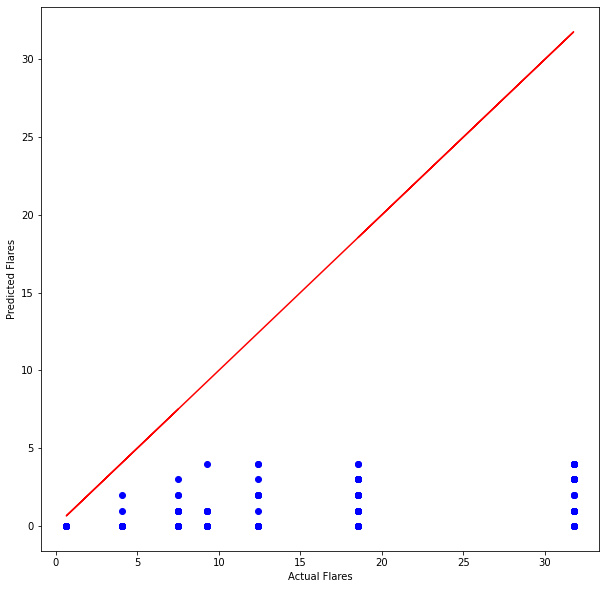

In [72]:
#Used to plot the regression line against the actual data points

plt.figure(figsize=(10,10))

plt.scatter(lgr_preds, y_test, color="blue")
preds = lgr_preds.tolist()
plt.plot(preds, preds,"r")
plt.xlabel('Actual Flares')
plt.ylabel('Predicted Flares')

# We used Confusion Matrices and the accuracy score to measure the result of each of the classification models.

## KNN

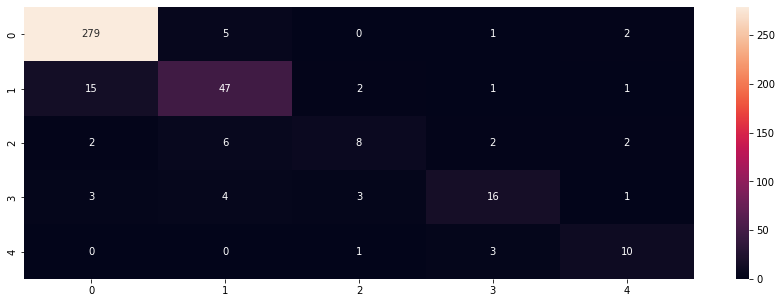

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test,knn_preds)
sb.heatmap(cm,annot=True,fmt='g')
plt.show()

In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(knn_preds,y_test)

0.8695652173913043

## Decision Tree

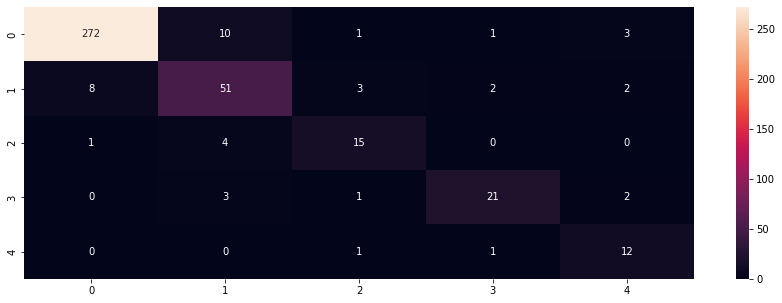

In [75]:
import seaborn as sb

plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test,dtc_preds)
sb.heatmap(cm,annot=True,fmt='g')
plt.show()

In [76]:
accuracy_score(dtc_preds,y_test)

0.8961352657004831

# Random Forest Classifier

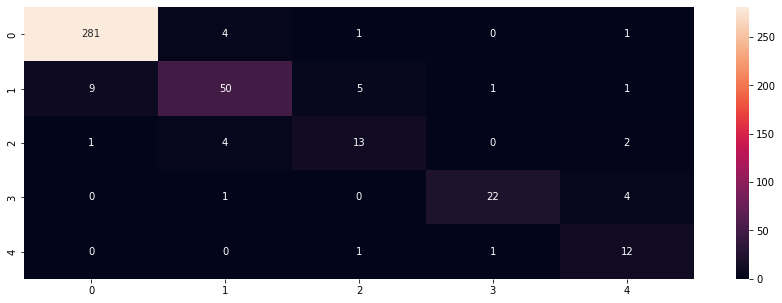

In [77]:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test,rfc_preds)
sb.heatmap(cm,annot=True,fmt='g')
plt.show()

In [78]:
accuracy_score(rfc_preds,y_test)

0.9130434782608695

## Naive Bayes

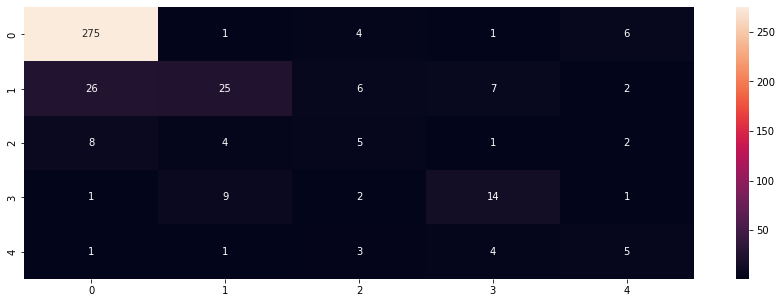

In [79]:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test,gnb_preds)
sb.heatmap(cm,annot=True,fmt='g')
plt.show()

In [80]:
accuracy_score(gnb_preds,y_test)

0.782608695652174

## SVM

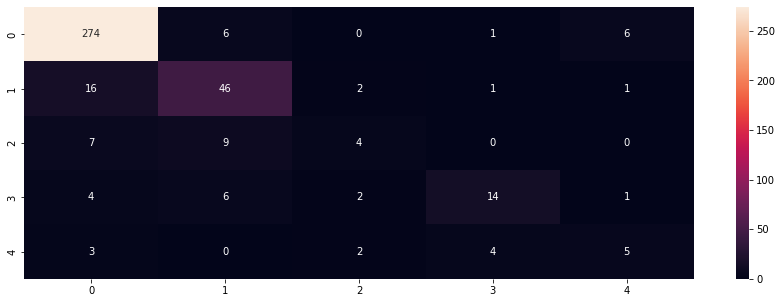

In [81]:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test,svc_preds)
sb.heatmap(cm,annot=True,fmt='g')
plt.show()

In [82]:
accuracy_score(svc_preds,y_test)

0.8285024154589372

## XGBoost

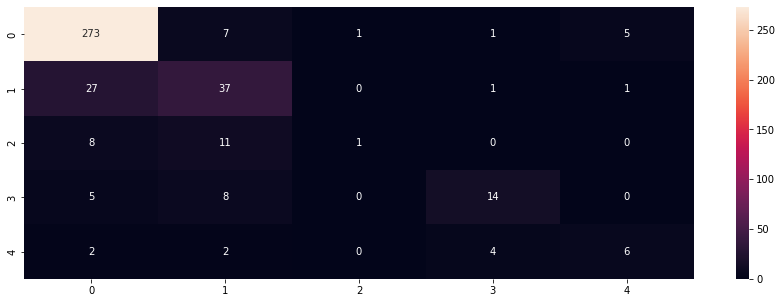

In [83]:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test,xgb_preds)
sb.heatmap(cm,annot=True,fmt='g')
plt.show()

In [84]:
accuracy_score(xgb_preds,y_test)

0.7995169082125604

## AdaBoost Ensemble Classifier

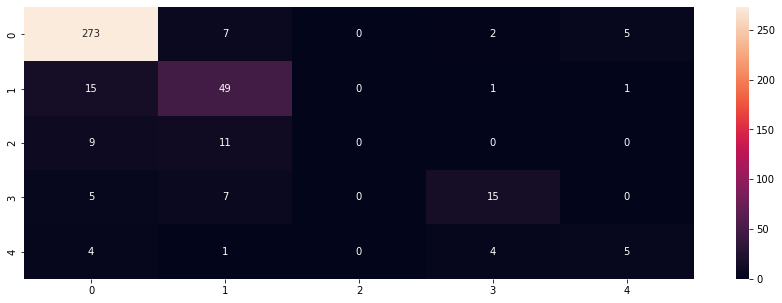

In [85]:
plt.figure(figsize=(15,5))
cm = confusion_matrix(y_test,abc_preds)
sb.heatmap(cm,annot=True,fmt='g')
plt.show()

In [86]:
accuracy_score(abc_preds,y_test)

0.8260869565217391